In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data and EDA

In [3]:
df = pd.read_csv('restaurant-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200847 entries, 0 to 200846
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   transactionstarttime  200847 non-null  object
 1   transactionnumber     200847 non-null  int64 
 2   timestamp             200847 non-null  object
 3   coursename            200847 non-null  object
 4   coursenumber          200847 non-null  int64 
 5   coursestarttime       200847 non-null  object
 6   itemcooktime          200847 non-null  int64 
 7   itemdescription       200847 non-null  object
 8   itemid                200847 non-null  int64 
 9   itemquantity          200847 non-null  int64 
 10  itemnumber            200847 non-null  int64 
 11  parentitemnumber      200847 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 18.4+ MB


In [5]:
df.describe()

,transactionnumber,coursenumber,itemcooktime,itemid,itemquantity,itemnumber,parentitemnumber
count,2.008470e+05,200847.000000,200847.000000,200847.000000,200847.000000,2.008470e+05,2.008470e+05
mean,1.595075e+06,2.080041,238.250773,15568.038253,0.999084,1.667881e+08,7.291816e+07
std,2.479370e+06,1.330705,55.964681,13345.848918,0.030254,2.596816e+08,1.906006e+08
min,1.000100e+04,1.000000,20.000000,116.000000,0.000000,1.048592e+06,0.000000e+00
25%,3.003600e+04,1.000000,240.000000,4523.000000,1.000000,3.162138e+06,0.000000e+00
50%,5.001100e+04,2.000000,240.000000,15410.000000,1.000000,5.250064e+06,0.000000e+00
75%,5.560050e+06,3.000000,240.000000,21358.000000,1.000000,5.830094e+08,4.212167e+06
max,5.560620e+06,17.000000,1322.000000,89346.000000,1.000000,5.830253e+08,5.830253e+08


In [6]:
df.shape

(200847, 12)

In [7]:
df.columns

Index(['transactionstarttime', 'transactionnumber', 'timestamp', 'coursename',
       'coursenumber', 'coursestarttime', 'itemcooktime', 'itemdescription',
       'itemid', 'itemquantity', 'itemnumber', 'parentitemnumber'],
      dtype='object')

In [8]:
missing_values = df.isnull().sum()
missing_values

transactionstarttime    0
transactionnumber       0
timestamp               0
coursename              0
coursenumber            0
coursestarttime         0
itemcooktime            0
itemdescription         0
itemid                  0
itemquantity            0
itemnumber              0
parentitemnumber        0
dtype: int64

In [9]:
df.head()

,transactionstarttime,transactionnumber,timestamp,coursename,coursenumber,coursestarttime,itemcooktime,itemdescription,itemid,itemquantity,itemnumber,parentitemnumber
0,2022-03-06 11:06:56,30001,2022-03-06 11:34:09,ENTREES,3,2022-03-06 11:17:26,240,Kids LoMein 2oz,8208,1,3145987,0
1,2022-03-06 11:06:56,30001,2022-03-06 11:34:09,ENTREES,3,2022-03-06 11:17:26,240,Kid's Fruit,8213,1,3146002,3145987
2,2022-03-06 11:06:56,30001,2022-03-06 11:34:09,ENTREES,3,2022-03-06 11:17:26,240,Kid's Fruit,8213,1,3146008,3145987
3,2022-03-06 11:12:59,30002,2022-03-06 11:34:58,ENTREES,3,2022-03-06 11:30:05,240,Kids FR 2oz,8209,1,3150773,0
4,2022-03-06 11:12:59,30002,2022-03-06 11:34:58,ENTREES,3,2022-03-06 11:30:05,240,Kid's Fruit,8213,1,3150836,3150773


In [10]:
#converting dates
df['transactionstarttime'] = pd.to_datetime(df['transactionstarttime'])

In [11]:
#feature selection
df['Date'] = df['transactionstarttime'].dt.date
sales = df.groupby('Date')['itemquantity'].sum().reset_index()
sales.columns = ['Date', 'TotalDailySales']

In [12]:
sales.head()

,Date,TotalDailySales
0,2022-03-01,4133
1,2022-03-02,4744
2,2022-03-03,5328
3,2022-03-04,8057
4,2022-03-05,9872


In [13]:
sales.tail()

,Date,TotalDailySales
25,2022-03-26,10877
26,2022-03-27,8696
27,2022-03-28,6036
28,2022-03-29,6364
29,2022-03-30,5691


In [14]:
sales.shape

(30, 2)

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             30 non-null     object
 1   TotalDailySales  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


<Axes: >

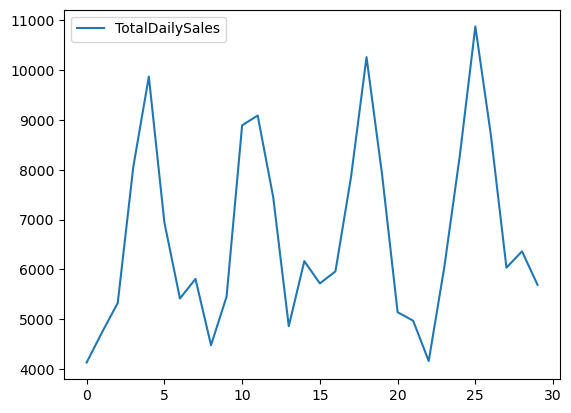

In [16]:
sales.plot()

In [17]:
#Calculating Moving Averages
sales['7-Day-MA'] = sales['TotalDailySales'].rolling(window=7).mean()
print(sales['TotalDailySales'].rolling(window=7).mean())

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6     6356.285714
7     6595.857143
8     6558.142857
9     6576.285714
10    6695.857143
11    6584.000000
12    6656.428571
13    6577.142857
14    6628.142857
15    6805.285714
16    6877.571429
17    6728.285714
18    6895.857143
19    6961.142857
20    7001.142857
21    6830.285714
22    6607.714286
23    6619.000000
24    6681.142857
25    6769.000000
26    6881.714286
27    7009.428571
28    7208.428571
29    7426.857143
Name: TotalDailySales, dtype: float64


In [18]:
# sales[['TotalDailySales','7-Day MA']].plot(figsize=(12, 6))

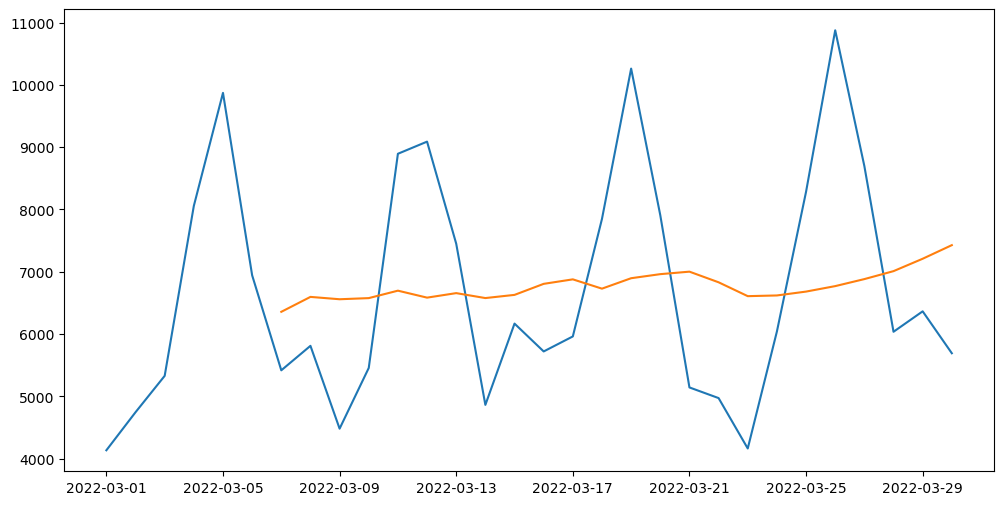

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(sales['Date'], sales['TotalDailySales'], label='Daily Sales')
plt.plot(sales['Date'], sales['7-Day-MA'], label='7-Day Moving Average')
plt.show()

In [20]:
sales.head()

,Date,TotalDailySales,7-Day-MA
0,2022-03-01,4133,NaN
1,2022-03-02,4744,NaN
2,2022-03-03,5328,NaN
3,2022-03-04,8057,NaN
4,2022-03-05,9872,NaN


In [21]:
sales.tail()

,Date,TotalDailySales,7-Day-MA
25,2022-03-26,10877,6769.000000
26,2022-03-27,8696,6881.714286
27,2022-03-28,6036,7009.428571
28,2022-03-29,6364,7208.428571
29,2022-03-30,5691,7426.857143


In [22]:
sales['7-Day-MA'].fillna(method='bfill', inplace=True)

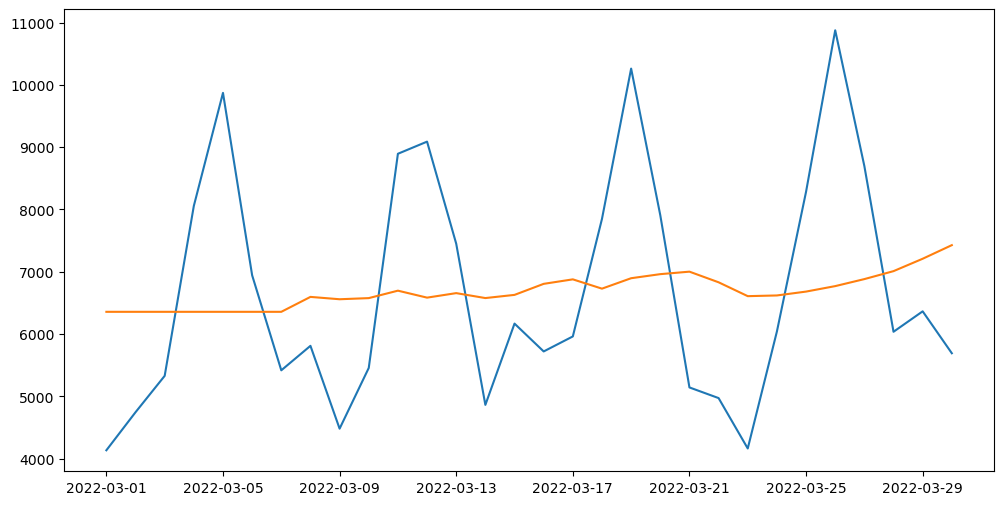

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(sales['Date'], sales['TotalDailySales'], label='Daily Sales')
plt.plot(sales['Date'], sales['7-Day-MA'], label='7-Day Moving Average')
plt.show()

In [24]:
#check if data is stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("non-stationary ")

In [25]:
adf_test(sales['TotalDailySales'])

ADF Statistics: -5.210876679546548
p- value: 8.35350090818037e-06
stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

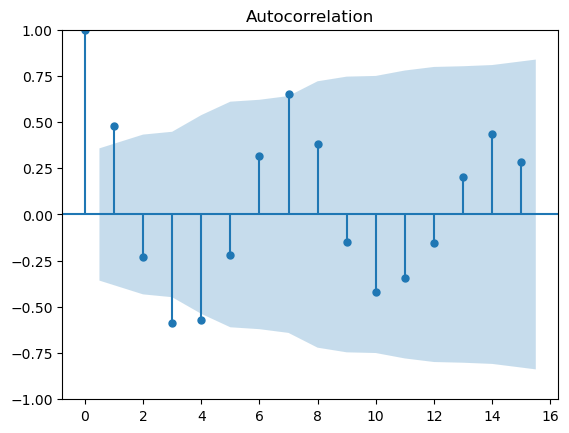

In [27]:
acf = plot_acf(sales['TotalDailySales'])

In [28]:
# acf = plot_acf(sales['7-Day-MA'])

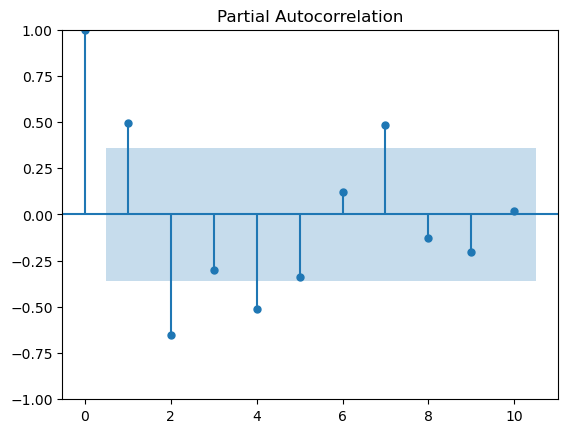

In [29]:
max_lags = min(10, len(sales) // 2 - 1)
pacf = plot_pacf(sales['TotalDailySales'], lags=max_lags)

In [30]:
#Forecasting Sales

In [31]:
train_size = int(len(sales) * 0.8)
train, test = sales['TotalDailySales'][:train_size], sales['TotalDailySales'][train_size:]

In [32]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(6, 1, 8))#p(lag order), b(differencing), q(order moving average) 

In [33]:
arima_model = model.fit()

C:\Users\anagh\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
# arima_model.summary()

In [35]:
forecast = arima_model.forecast(steps=len(test))
test = test.reset_index(drop=True)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 730.5843321754271, MAE: 632.9833810863789


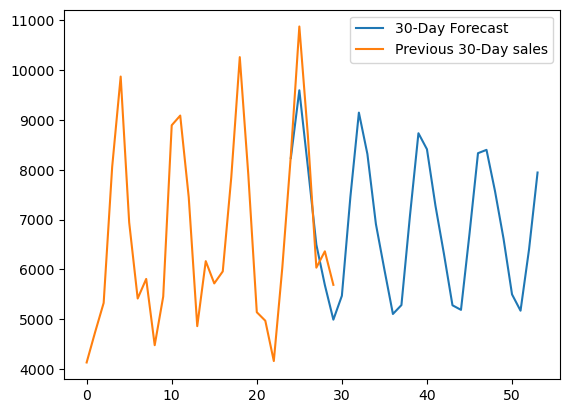

In [37]:
future_forecast = arima_model.forecast(steps=30)
plt.plot(future_forecast, label='30-Day Forecast')
plt.plot(sales['TotalDailySales'], label = 'Previous 30-Day sales')
plt.legend()
plt.show()

In [62]:
#Prediction model using Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [64]:
sales['DayOfWeek'] = pd.to_datetime(sales['Date']).dt.dayofweek

In [65]:
sales['30-Day-MA'] = sales['TotalDailySales'].rolling(window=30).mean()
sales['30-Day-MA'].fillna(sales['30-Day-MA'].mean(), inplace=True)

In [66]:
sales['PreviousDaySales'] = sales['TotalDailySales'].shift(1)
sales['7-Day-MA'] = sales['7-Day-MA'].shift(1)
sales['30-Day-MA'] = sales['30-Day-MA'].shift(1)
sales.dropna(inplace=True)

In [67]:
X = sales[['DayOfWeek',  '7-Day-MA', '30-Day-MA']]
y = sales['TotalDailySales']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
predictions = rf_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [71]:
print(f'R²: {r2}, RMSE: {rmse}')

R²: 0.6488560084271968, RMSE: 821.1060543458034


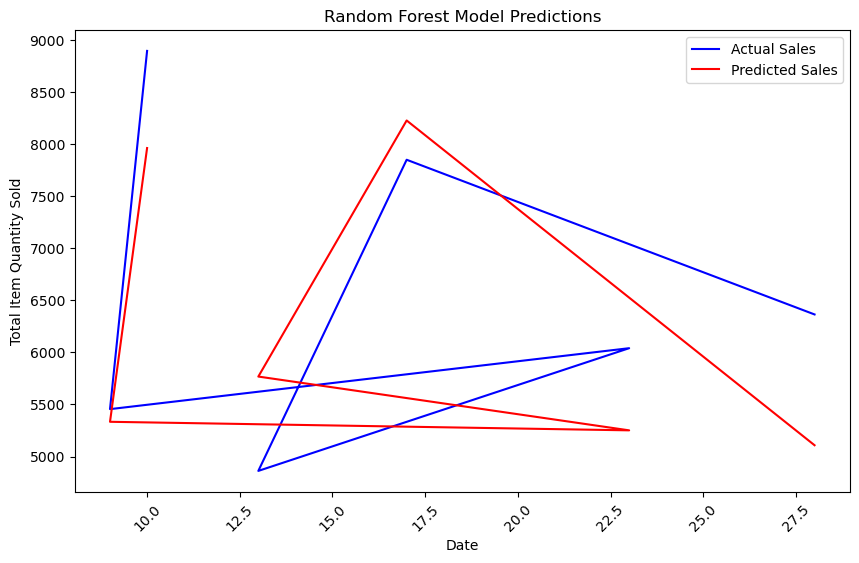

In [72]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is the output from the Random Forest model
plt.figure(figsize=(10, 6))

# Plot actual sales values from y_test
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue')

# Plot predicted sales values from predictions
plt.plot(y_test.index, predictions, label='Predicted Sales', color='red')

plt.title('Random Forest Model Predictions')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.show()
